О датасете: 
 - Этот набор данных включает в себя различные функции, связанные с покупательскими предпочтениями клиентов, и собирает важную информацию для компаний, стремящихся улучшить понимание своей клиентской базы. Функции включают возраст клиента, пол, сумму покупки, предпочтительные способы оплаты, частоту покупок и рейтинги отзывов. Кроме того, включены данные о типе приобретаемых товаров, частоте покупок, предпочтительных сезонах покупок и взаимодействии с рекламными предложениями. Этот набор данных, содержащий 3900 записей, служит основой для компаний, стремящихся применять основанную на данных информацию для более эффективного принятия решений и стратегий, ориентированных на клиента.¶

1. импортируем библиотеки и создаем массив из цветов, которые мы будет использовать в визуализации. Далее получаем данные и собираем информацию о них: размерность, столбцы, инфо, describe.

In [4]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]
df = pd.read_csv("shopping_trends_updated.csv")
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2991,2992,66,Female,Dress,Clothing,71,Utah,L,Green,Summer,3.90,No,Standard,No,No,7,PayPal,Bi-Weekly
3748,3749,34,Female,Backpack,Accessories,25,Delaware,M,Violet,Fall,3.90,No,2-Day Shipping,No,No,3,Venmo,Annually
577,578,19,Male,Skirt,Clothing,52,Alabama,M,Black,Fall,3.70,Yes,Store Pickup,Yes,Yes,41,Venmo,Annually
1807,1808,34,Male,Sneakers,Footwear,46,Vermont,L,Gold,Summer,3.50,No,Standard,No,No,37,Venmo,Fortnightly
2834,2835,39,Female,Jacket,Outerwear,43,Texas,M,Indigo,Fall,2.90,No,2-Day Shipping,No,No,17,Credit Card,Weekly


In [8]:
df.shape

(3900, 18)

In [7]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [11]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,59.76,3.75,25.35
std,"1,125.98",15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,"1,950.50",44.00,60.00,3.70,25.00
75%,"2,925.25",57.00,81.00,4.40,38.00
max,"3,900.00",70.00,100.00,5.00,50.00


2. Проверяем наличие в наборе данных нулевых значений?

In [12]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

3. Пропущенных значений нет, следовательно можно переходить к визуализации данных. Построим столбчатую, круговую диаграммы, гистограммы с разными наборами данных.

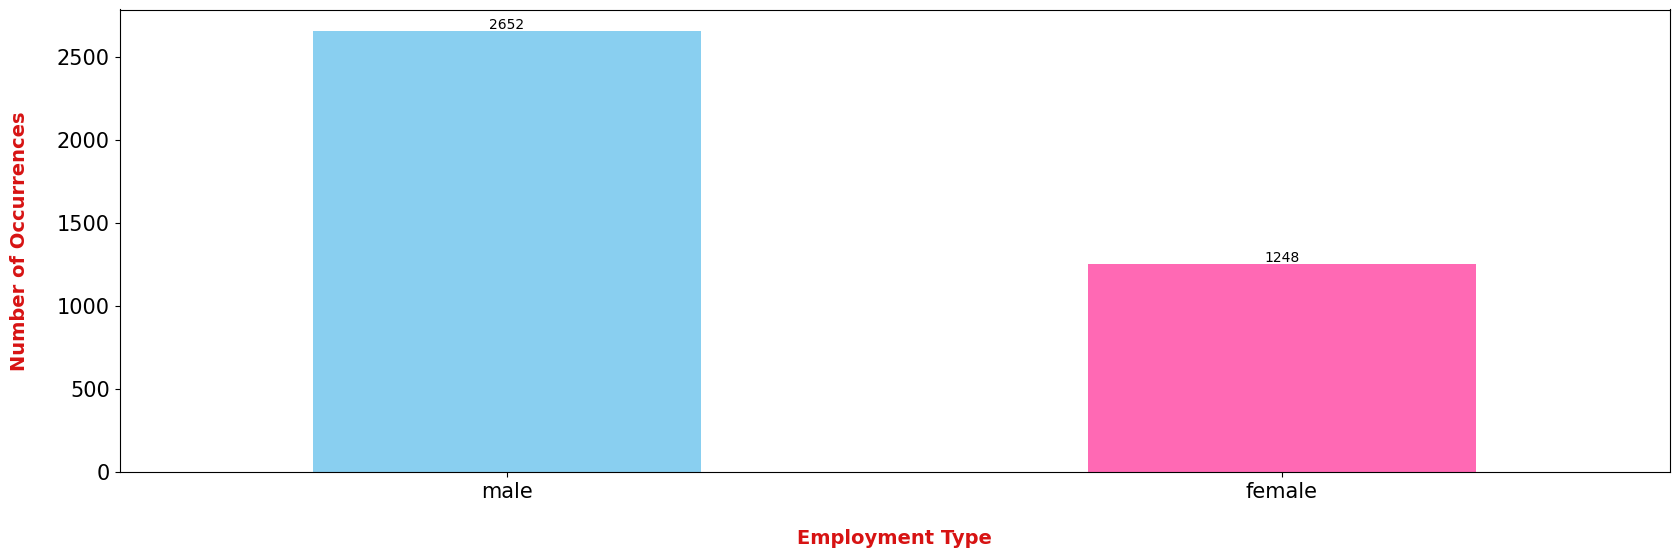

In [13]:
plt.figure(figsize=(20,6))
ax = df['Gender'].value_counts().plot(kind='bar', color = colors, rot = 0)
ax.set_xticklabels(('male', 'female'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis='both', labelsize = 15)
    
    plt.xlabel('Employment Type', weight = 'bold', color = "#D71313", fontsize = 14, labelpad = 20)
    plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

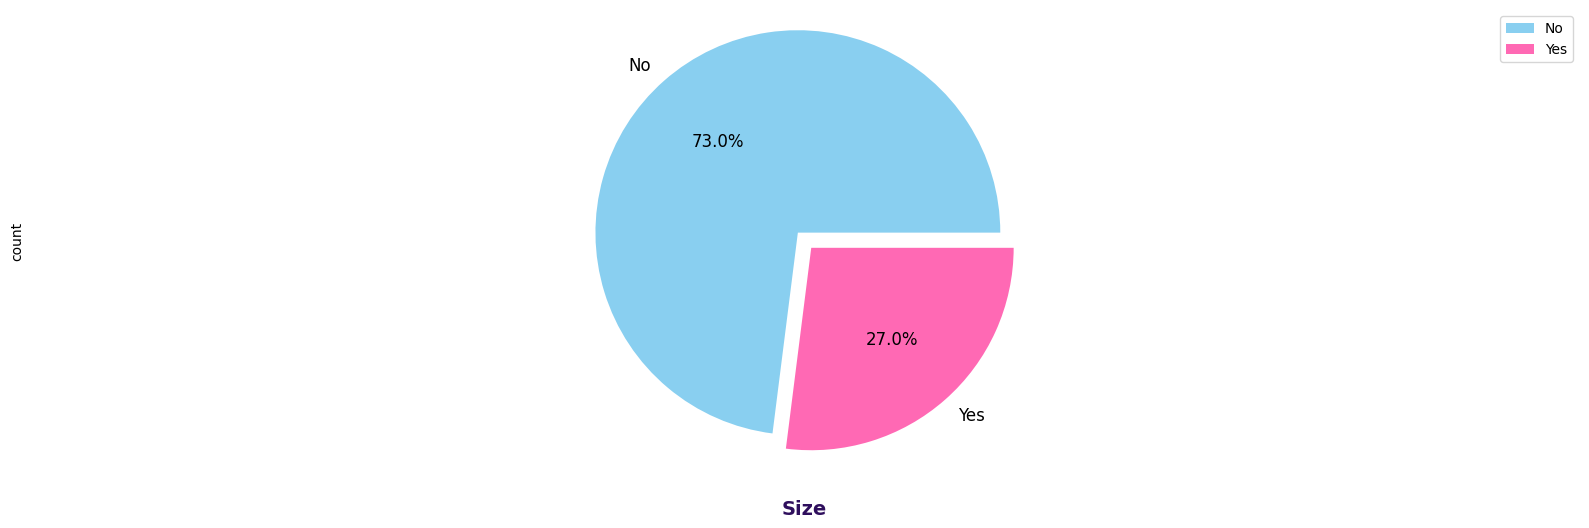

In [18]:
plt.figure(figsize = (20, 6))
counts = df["Subscription Status"].value_counts()
explode = (0, 0.1)
counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = 1)
plt.show()

In [19]:
df["Payment Method"].value_counts()

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

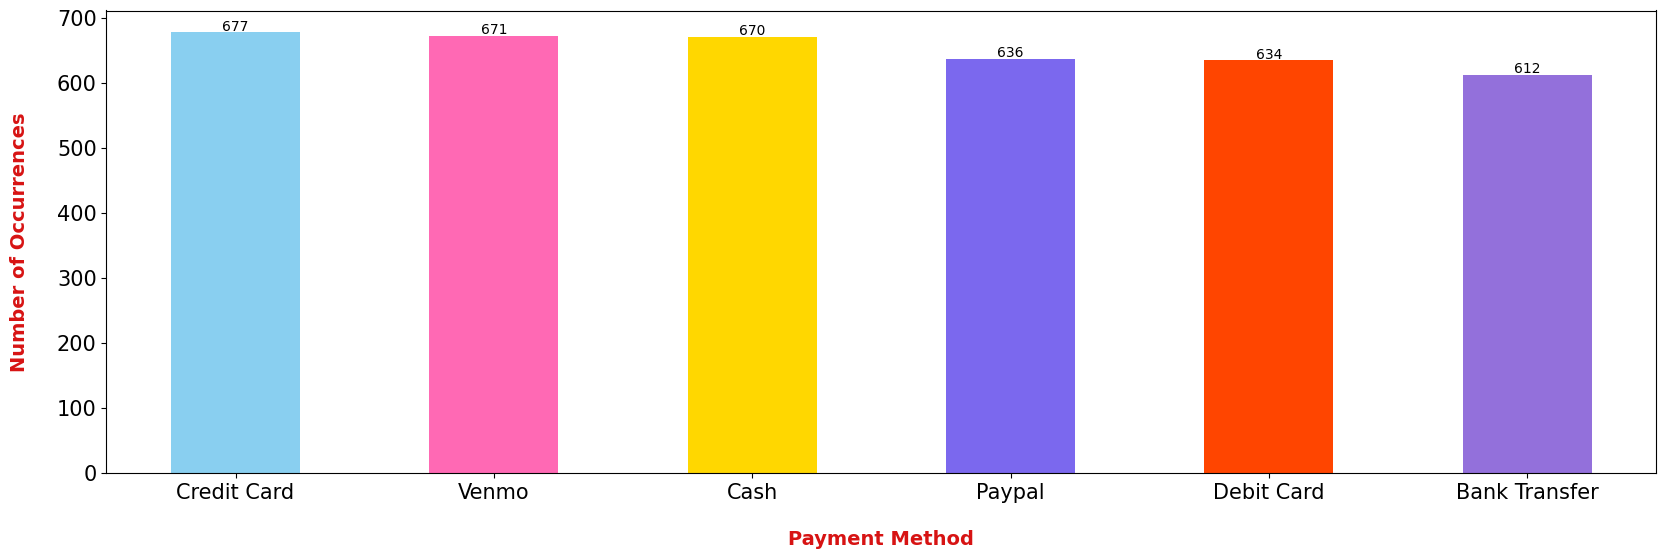

In [25]:
plt.figure(figsize = (20, 6))
ax = df["Payment Method"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Credit Card', 'Venmo', 'Cash', 'Paypal', 'Debit Card', 'Bank Transfer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() -1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Payment Method', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

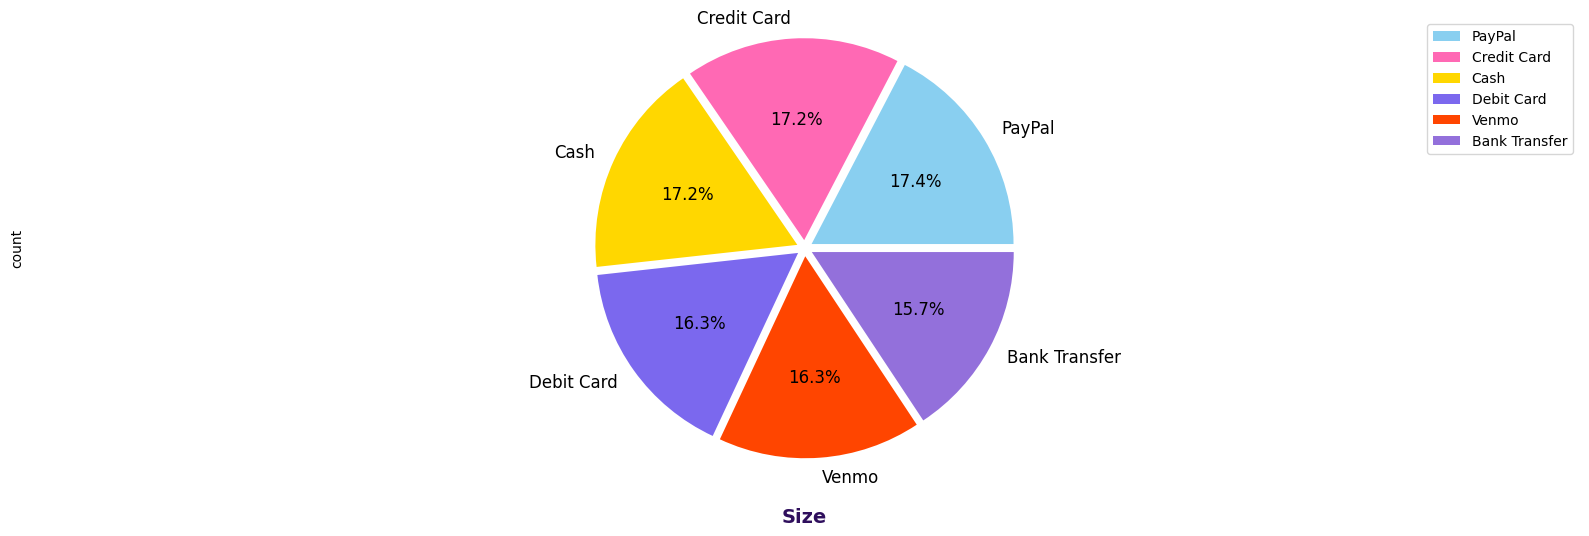

In [31]:
plt.figure(figsize = (20, 6))

counts = df["Payment Method"].value_counts()
explode = (0.04, 0.04, 0.04, 0.04, 0.04, 0.04)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [39]:
df["Frequency of Purchases"].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

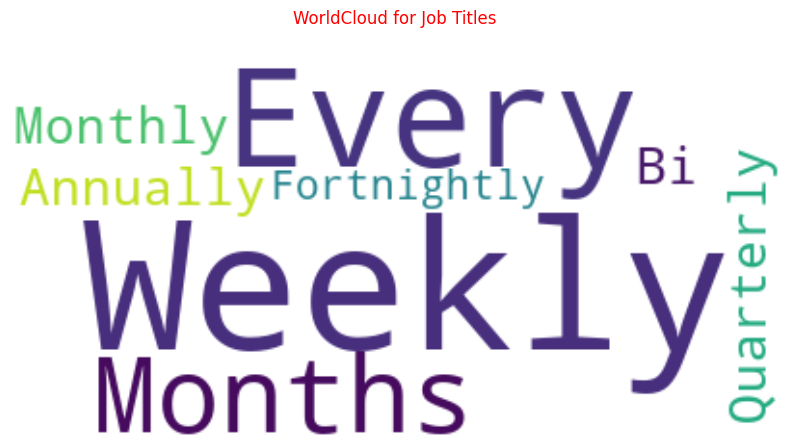

In [38]:
text = " ".join(title for title in df["Frequency of Purchases"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (20, 5))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('WorldCloud for Job Titles\n', fontsize = 12, color = "#FF0000")
plt.show()

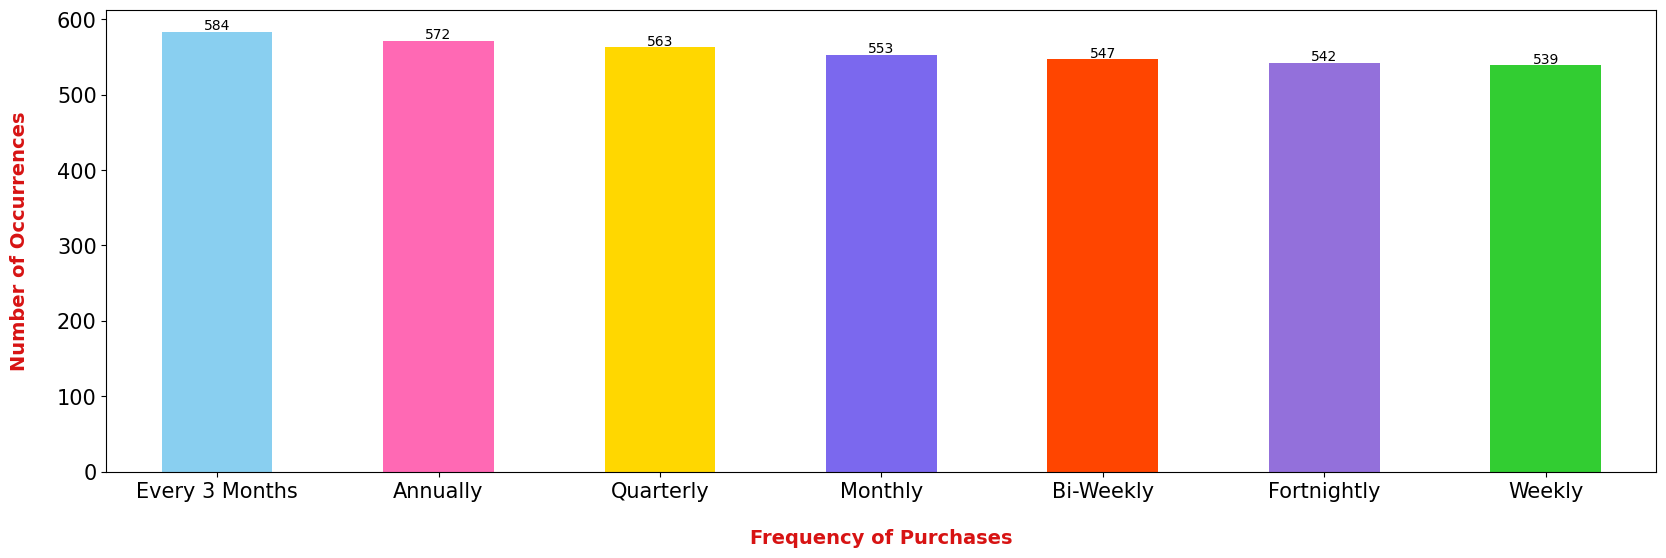

In [41]:
plt.figure(figsize = (20, 6))
ax = df["Frequency of Purchases"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly', 'Fortnightly', 'Weekly'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() -1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Frequency of Purchases', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

4. Ответим на некоторые вопросы о наборе данных.

In [44]:
average_age = df['Age'].mean()
print("Средний возраст покупателей:", average_age)

Средний возраст покупателей: 44.06846153846154


In [45]:
most_common_item = df['Item Purchased'].mode()[0]
print("Самый популярный товар в датасете:", most_common_item)

Самый популярный товар в датасете: Blouse


In [48]:
total_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].sum()
print("Общая сумма покупки по категориям:")
print(total_purchase_by_category)

Общая сумма покупки по категориям:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


In [49]:
average_rating_male = df[df['Gender'] == 'Male']['Review Rating'].mean()
average_rating_female = df[df['Gender'] == 'Female']['Review Rating'].mean()
print("Средний рейтинг отзывов для клиентов мужчин:", average_rating_male)
print("Средний рейтинг отзывов для клиентов женщин:", average_rating_female)

Средний рейтинг отзывов для клиентов мужчин: 3.7539592760180995
Средний рейтинг отзывов для клиентов женщин: 3.741426282051282


In [50]:
most_payment_item = df['Payment Method'].mode()[0]
print("Самый популярный метод оплаты в датасете:", most_payment_item)

Самый популярный метод оплаты в датасете: PayPal


In [51]:
subscription_count = df[df['Subscription Status'] == 'Yes']['Customer ID'].count()
print("Number of Customers with Subscription: ", subscription_count)

Number of Customers with Subscription:  1053


In [52]:
avg_purchase_subscription_yes = df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)'].mean()
avg_purchase_subscription_no = df[df['Subscription Status'] == 'No']['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Subscription 'Yes':", avg_purchase_subscription_yes)
print("Average Purchase Amount for Subscription 'No':", avg_purchase_subscription_no)

Average Purchase Amount for Subscription 'Yes': 59.49192782526116
Average Purchase Amount for Subscription 'No': 59.865121180189675


In [53]:
most_common_season = df['Season'].mode()[0]
print("Самый популярный сезон года для покупки:", most_common_season)

Самый популярный сезон года для покупки: Spring


In [56]:
avg_purchase_age = df[df['Season'] == 'Summer']['Age'].mean()
print("Средний возраст покупателей, совершивших покупку летом: ", avg_purchase_age)

Средний возраст покупателей, совершивших покупку летом:  43.973821989528794


In [57]:
max_review_rating = df['Review Rating'].max()
min_review_rating = df['Review Rating'].min()
print("Maximum Review Rating:", max_review_rating)
print("Minimum Review Rating:", min_review_rating)

Maximum Review Rating: 5.0
Minimum Review Rating: 2.5


In [60]:
common_shipping_high_rating = df[df['Review Rating'] > 4]['Shipping Type'].mode()[0]
print("Most Common Shipping Type for High Review Ratings:", common_shipping_high_rating)


Most Common Shipping Type for High Review Ratings: Standard


In [61]:
common_category_low_rating_female = df[(df['Gender'] == 'Female') & (df['Review Rating'] < 3)]['Category'].mode()[0]
print("Most Common Category for Low Review Rating Female Customers:", common_category_low_rating_female)

Most Common Category for Low Review Rating Female Customers: Clothing


In [62]:
total_purchase_by_location = df.groupby('Location')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Location:")
print(total_purchase_by_location)

Total Purchase Amount by Location:
Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee    

5. Построим график KDE для суммы покупки по сезонам

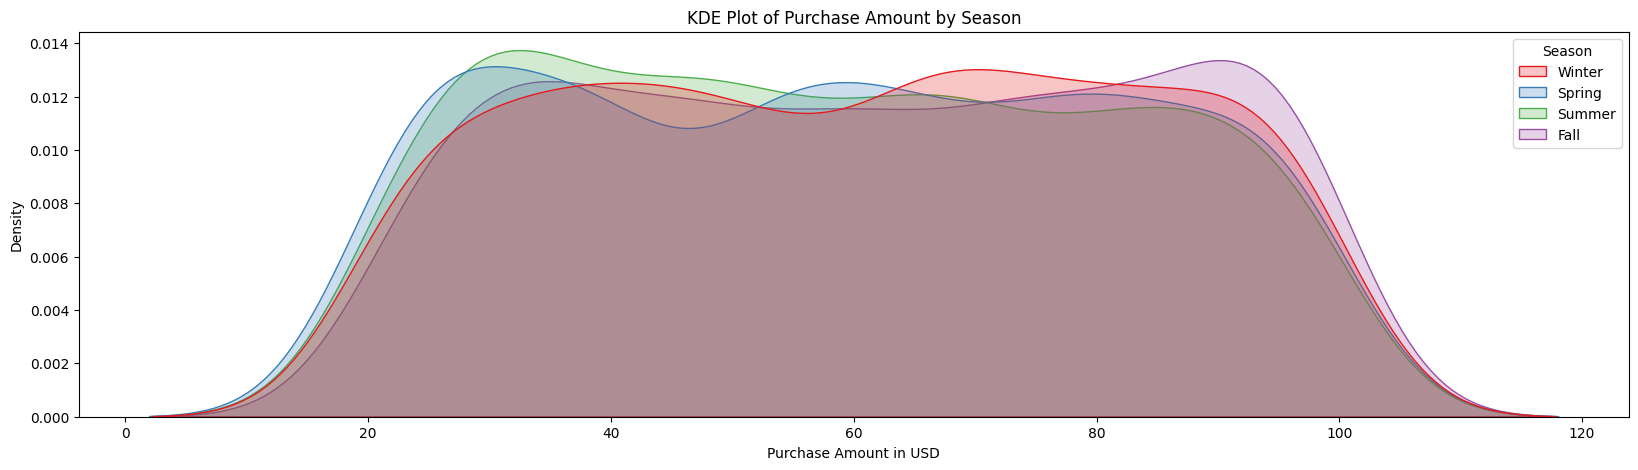

In [63]:
plt.figure(figsize=(20, 5))
sns.kdeplot(data = df, x = 'Purchase Amount (USD)', hue = 'Season', common_norm = False, fill = True, palette = 'Set1')
plt.title('KDE Plot of Purchase Amount by Season')
plt.xlabel('Purchase Amount in USD')
plt.show()

6. Построим гистограмму возрастного распределения.

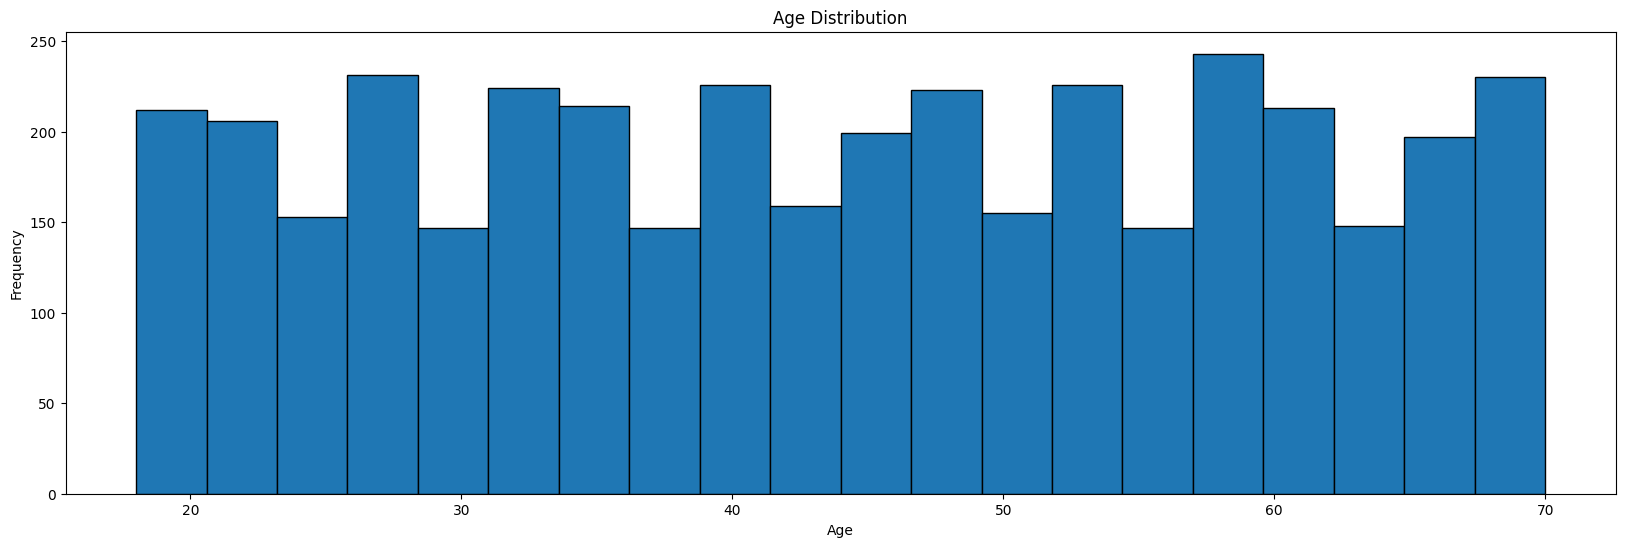

In [64]:
plt.figure(figsize = (20, 6))
plt.hist(df['Age'], bins = 20, edgecolor = 'k')
plt.title('Возрастное распределение')
plt.xlabel('Возраст')
plt.ylabel('Значения')
plt.show()

7. Построим гистограмму по способу оплаты по сезонам.

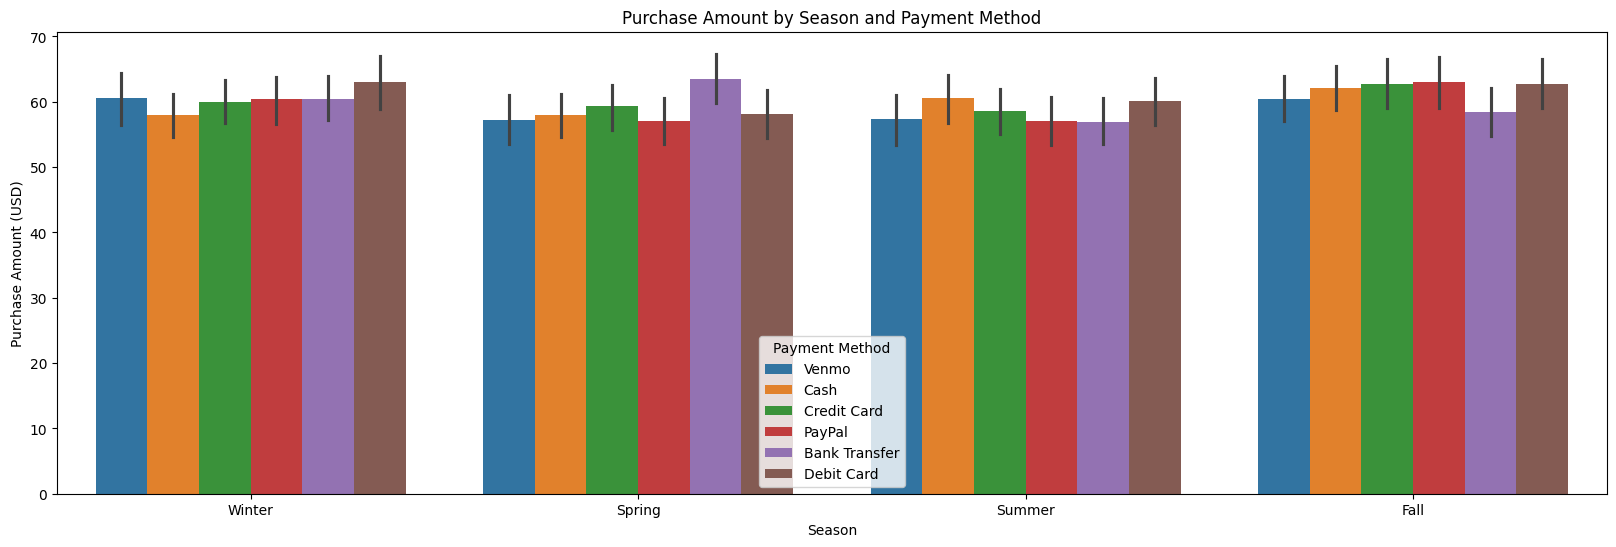

In [65]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Season', y='Purchase Amount (USD)', hue='Payment Method', data=df)
plt.title('Purchase Amount by Season and Payment Method')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.show()

8. Построим график с областями зависимости общей суммы покупки по категориям

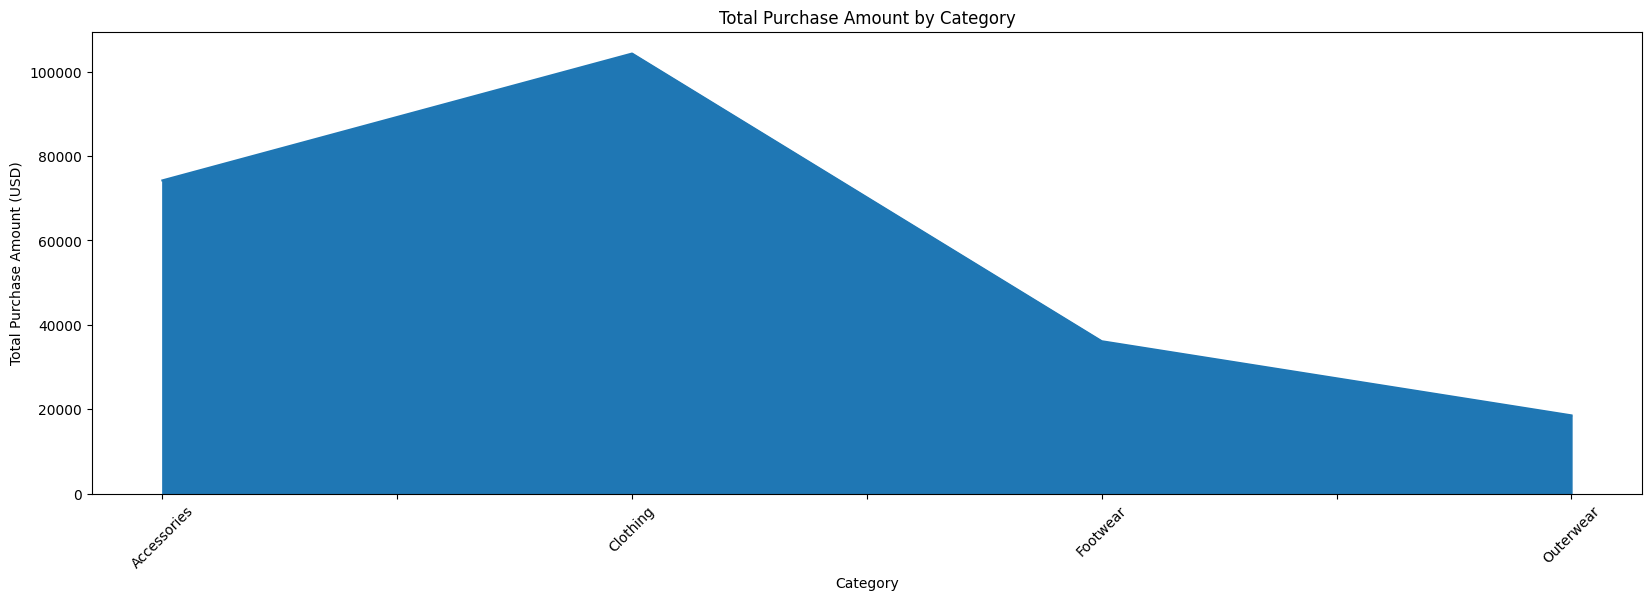

In [67]:
plt.figure(figsize=(20, 6))
category_purchase_total = df.groupby('Category')['Purchase Amount (USD)'].sum()

category_purchase_total.plot(kind='area')
plt.title('Total Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()